In [247]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [248]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion=np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [249]:
class habitante(Agente):
    """
    Aquí se encuentra el registro de los habitantes de Sugarscape.
    Su lugar de nacimiento y sus características individuales.
    """
    def __init__(self,id_h):     
        
        #Registro de los habitantes de Sugarscape
        self.id = id_h
        
        #Lugar de nacimiento de los habitantes
        self.x = np.random.randint(0,9)
        self.y = np.random.randint(0,9)
        
        #Atributos
        self.vision = 1
        
        #Características físicas
        self.edad=0
        self.esperanzaV = np.random.uniform(50, 80)
        self.hambre = 5
        self.azucar = 0
        self.metabolismo = np.random.randint(1,5)
        self.bienes = 0
    
    def decision(self, ocupacion, Bienes):
        maximo = 0
        pos_x = 0
        pos_y = 0
        #print(self.x,self.y)
        #print("===================")
        for i in range(-1*self.vision,1*self.vision+1):
            for j in range(-1*self.vision,1*self.vision+1):
                #print(f'i:{i},j:{j},{Bienes[i][j]}')
                if (self.x + i >= 0 and self.y + j >= 0 and self.x + i <= 9 and self.y + j <= 9 and
                   Bienes[self.x+i][self.y+j].cantidad > maximo and ocupacion[self.x+i][self.y+j] == 0):
                    maximo = Bienes[self.x+i][self.y+j].cantidad
                    #print(f'max i:{i},j:{j},{Bienes[self.x+i][self.y+j]}')
                    pos_x = i
                    pos_y = j
        return pos_x, pos_y

    def actualizar(self, agentes, bienes, ocupacion):
        ocupacion_n = self.moverse(ocupacion, bienes) #Lo primero que hace es moverse
        bienes_n = self.comer_agarrar(bienes) #Si se cumplen ciertas necesidades el habitante come
        return bienes_n, ocupacion_n
    
    def comer_agarrar(self, bienes): #Si se cumplen ciertas necesidades el habitante come
        agarrar = False
        if(self.hambre < 5 and self.bienes > 0):
            if (self.bienes > 5):
                    self.hambre = self.hambre + 5
                    self.bienes = self.bienes - 5
            else:
                self.hambre = self.hambre + self.bienes
                self.bienes = 0
        elif(self.hambre < 5):
                self.hambre = self.hambre + bienes[self.x][self.y].cantidad
                agarrar = True
        elif(agarrar == False):
            self.bienes = self.bienes + bienes[self.x][self.y].cantidad
        bienes[self.x][self.y].cantidad = 0 
        return bienes
                
    def moverse(self, ocupacion, Bienes):
        ocupacion[self.x][self.y] = 0
        #---...
        if self.es_viejo():
            return ocupacion
        elif self.tiene_hambre():
            return ocupacion
        else:
            i, j = self.decision(ocupacion, Bienes) #Se mueve en direccion al bien mas cercano
            self.x = self.x + i
            self.y = self.y + j
            #print(self.x,self.y)
            ocupacion[self.x][self.y] = 1
            #se agrega edad por paso y se resta metabolismo por paso al hambre
            self.edad=self.edad+1
            self.hambre=self.hambre - 1
            return ocupacion
    
    #Nos permite ver si el habitante supera su esperanza de vida
    def es_viejo(self):
        """¿Pasa de la esperanza de vida?"""
        return self.edad > self.esperanzaV
    #Nos permite ver si el habitante gasta más energía de la que consume
    def tiene_hambre(self):
        """¿Pasa de la esperanza de vida?"""
        return self.hambre<=0

In [250]:
class bien(Agente):
    def __init__(self, tipo):
        #self.loc = np.array([random.randint(0, 51), random.randint(0, 51)]) #Posición al azar inicial
        self.tipo = tipo #Tipo 0 Especia, Tipo 1 Azucar
        alz = random.randint(0,3)
        if (alz == 0):
            self.cantidad = random.randint(0, 5)
        else:
            self.cantidad = 0
        
    def __str__(self):
        return str(self.cantidad)

In [251]:
class Mundo:
    def __init__(self, habitantes, bienes, steps, ancho = 51, alto = 51):
        self.habitantes = habitantes
        self.bienes = bienes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        for agente in self.agentes:
            self.bienes, self.ocupacion = agente.actualizar(self.agentes,self.bienes,self.ocupacion)
            
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
    
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim

In [252]:
class Sugarscape(Mundo):
    def __init__(self, c , ancho, alto, steps, habitantes):
        """
        c es la capacidad de azúcar de una celda, es decir, el valor
        máximo de unidades de azúcar que puede contener una celda.
        
        """
        
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.agentes = habitantes
        self.ocupacion = np.zeros([self.ancho, self.alto])
        for habitante in habitantes:
            self.ocupacion[habitante.x][habitante.y] = 1
        self.bienes = [[bien(i) for i in range(self.ancho)] for j in range(self.alto)]
        self.size = (self.ancho,self.alto)
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, self.ancho), ylim=(0, self.alto))
        
        #Propiedades de las parcelas de azúcar
        #Capacidad de azúcar por parcela/celda (aleatoria)
        self.capacidad = np.random.randint(0, c + 1, size = self.size)
        #Las unidades por parcela/celda
        self.level = np.random.randint(0, c + 1, size = self.size)
        #Para asegurar que la cantidad de unidades de azúcar por parcela
        #no excede la capacidad
        self.level = np.minimum.reduce([self.level,self.capacidad])
        #Habitantes y Azucares
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_H, = self.ax.plot([], [], 'o', markerfacecolor='orange', **plot_args)
        self.puntos_B, = self.ax.plot([], [], 's', markerfacecolor='green', **plot_args)
    
    def clean_screen(self):
        self.puntos_H.set_data([], [])
        self.puntos_B.set_data([], [])
        return 
    
    def dibujar(self,step): #Se dibujan los habitantes en naranja y los bienes con verde
        
        self.clean_screen()
        
        x_values_H, y_values_H = [], []
        x_values_B, y_values_B = [], []
        
        for habitante in self.agentes:
            if habitante.edad<habitante.esperanzaV and habitante.hambre>0:
                x = habitante.x
                y = habitante.y
                x_values_H.append(x)
                y_values_H.append(y)
        
        for i in range(self.ancho):
            for j in range(self.alto):
                if (self.bienes[i][j].cantidad != 0):
                    x_values_B.append(i)
                    y_values_B.append(j)

        self.puntos_H.set_data(x_values_H, y_values_H)
        self.puntos_B.set_data(x_values_B, y_values_B)
        
        self.ax.set_title('Paso {}'.format(step))

        return

In [253]:
num_habitantes = 5

Habitantes = [habitante(i) for i in range(num_habitantes)]

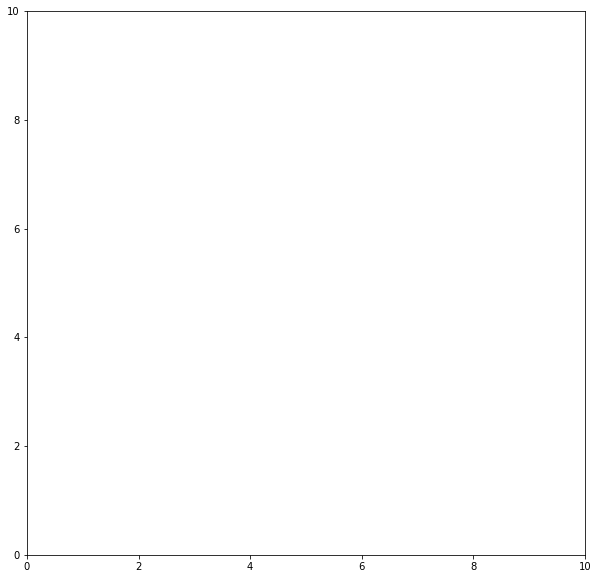

In [254]:
Mundo_azucarero = Sugarscape(c = 5, ancho = 10, alto = 10, steps = 100, habitantes = Habitantes)

simulacion = Mundo_azucarero.simular()

In [255]:
HTML(simulacion.to_html5_video())